In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

In [2]:
df = pd.read_hdf('frb_2016-10-zdcpr.h5', 'table', columns=['str_139', 'str_140'])
df.head()

,str_139,str_140
timestamp,,
2016-10-01 00:00:00,-67.547070,-69.976950
2016-10-01 00:00:30,-63.595103,-73.991370
2016-10-01 00:01:00,-67.608953,-69.128963
2016-10-01 00:01:30,-57.827370,-73.896880
2016-10-01 00:02:00,-73.987177,-67.994637


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89280 entries, 2016-10-01 00:00:00 to 2016-10-31 23:59:30
Freq: 30S
Data columns (total 1 columns):
str_139    81259 non-null float64
dtypes: float64(1)
memory usage: 3.9 MB


In [18]:
df.describe()

ValueError: Cannot describe a DataFrame without columns

In [11]:
x = df.index
y = df.str_139.values

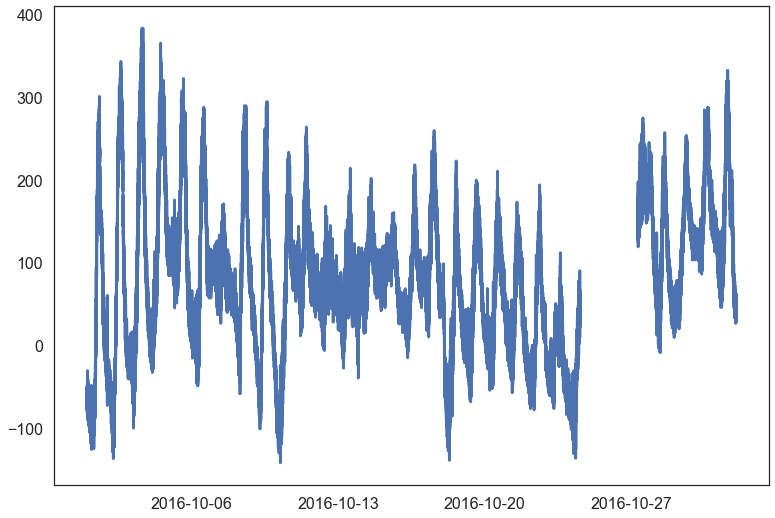

In [13]:
plt.plot(x, y)

In [24]:
df.isnull().sum()

str_139    8021
dtype: int64

In [34]:
s = 'str_139'

In [77]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, window):
    # rolling statistics
    rolmean = df.rolling(window=window, min_periods=2880*5).mean()
    rolstd = df.rolling(window=window, min_periods=2880*5).std()
    
    # plot
    plt.figure(dpi=300)
    orig = plt.plot(df, label='Data', linewidth=1)
    mean = plt.plot(rolmean, label='Rolling Mean', linewidth=1)
    std = plt.plot(rolstd, label='Rolling STD', linewidth=1)
    plt.legend()
    
#     # Dickey-Fuller test:
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(df[s].values, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key, value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)

```
1440: 12 hours
2880: 24 hours
20160: 1 week
```

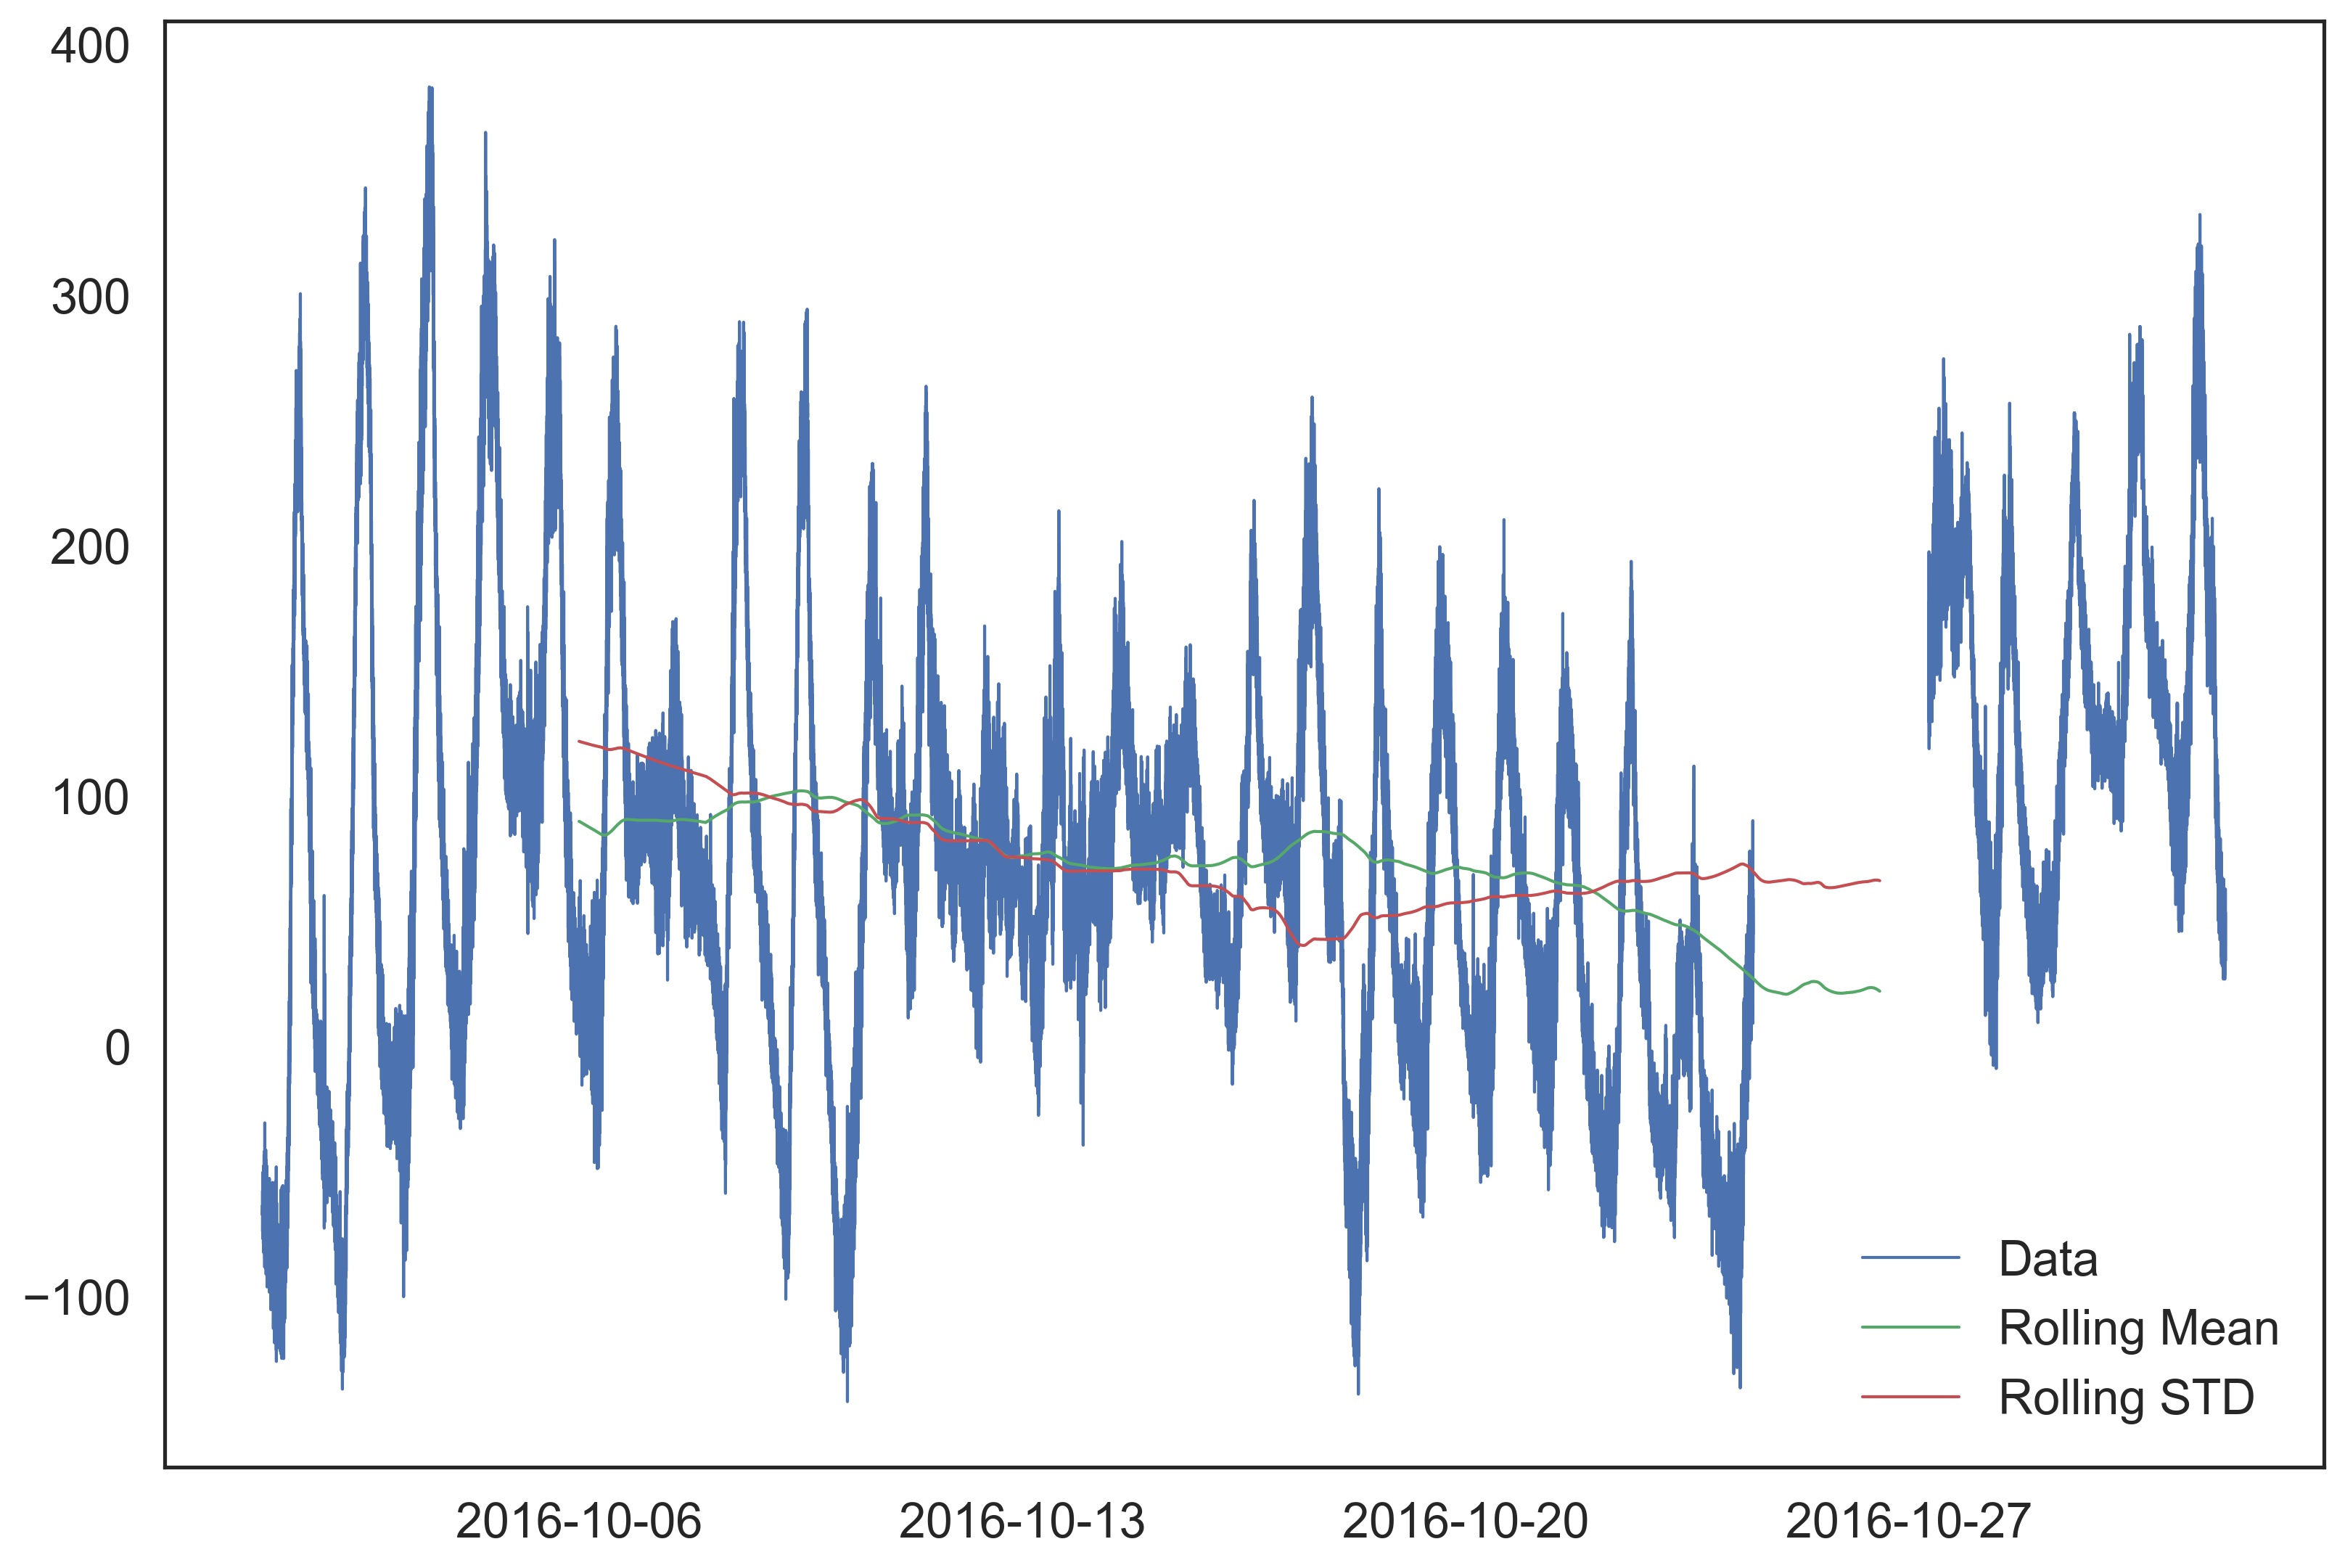

In [81]:
test_stationarity(df['str_139'], 20160)

In [75]:
df.iloc[2160]

str_139    53.561313
Name: 2016-10-08 08:20:00, dtype: float64

In [82]:
df = pd.read_hdf('frb_2016-10-zdcpr.h5', 'table')

In [83]:
df.columns

Index(['disp_100', 'disp_101', 'disp_145', 'disp_146', 'disp_147', 'disp_148',
       'disp_151', 'disp_152', 'disp_153', 'disp_154',
       ...
       'tmp_264', 'tmp_265', 'tmp_266', 'tmp_267', 'tmp_268', 'tmp_269',
       'tmp_270', 'tmp_271', 'tmp_273', 'tmp_road_274'],
      dtype='object', length=213)

In [85]:
a = df.columns

In [90]:
print(a[200:])

Index(['tmp_217', 'tmp_218', 'tmp_263', 'tmp_264', 'tmp_265', 'tmp_266',
       'tmp_267', 'tmp_268', 'tmp_269', 'tmp_270', 'tmp_271', 'tmp_273',
       'tmp_road_274'],
      dtype='object')


In [3]:
df2 = pd.read_hdf('frb_2016-11-zdcpr.h5', 'table')

In [93]:
colums = df.columns

In [94]:
df.str_139.std()

109.14988140506715

In [100]:
df[sensor].std()

124.80309259545405

In [115]:
d = pd.DataFrame()

for sensor in colums:
    d[sensor] = [df[sensor].std()]

In [127]:
d = d.transpose()

In [129]:
d.columns = ['main']

In [136]:
d.sort_values(by=['main'])

,main
tmp_1267,0.442391
tmp_1269,0.478429
tmp_1266,0.503375
tmp_1264,0.519886
tmp_1271,0.534828
tmp_1265,0.536612
tmp_1270,0.641199
tmp_1263,0.865828
tmp_1268,1.135298
disp_145,1.451642


In [4]:
dfs = pd.DataFrame()
dfs = dfs.append(df)
dfs = dfs.append(df2)

In [5]:
dfs.head()

,disp_100,disp_101,disp_1251,disp_1252,disp_1253,disp_1254,disp_1255,disp_1256,disp_1257,disp_1258,...,tmp_264,tmp_265,tmp_266,tmp_267,tmp_268,tmp_269,tmp_270,tmp_271,tmp_273,tmp_road_274
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfs.tail()

,disp_100,disp_101,disp_1251,disp_1252,disp_1253,disp_1254,disp_1255,disp_1256,disp_1257,disp_1258,...,tmp_264,tmp_265,tmp_266,tmp_267,tmp_268,tmp_269,tmp_270,tmp_271,tmp_273,tmp_road_274
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-11-30 23:57:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.203318,10.173789,10.315101,10.040682,-19.134316,9.922389,-19.505092,17.590933,NaN,NaN
2016-11-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.205717,10.176158,10.319109,10.042944,-19.125386,9.927041,-19.497034,17.610612,NaN,NaN
2016-11-30 23:58:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.200786,10.175547,10.319823,10.040967,-19.054749,9.922325,-19.262908,17.584998,NaN,NaN
2016-11-30 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.201487,10.175278,10.319503,10.038013,-19.194038,9.922549,-19.532640,17.608316,10.2,8.7
2016-11-30 23:59:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.197900,10.173279,10.318564,10.038406,-19.206719,9.924249,-19.450380,17.544588,NaN,NaN


In [17]:
#dfs.loc['2015-11': '2016-12']

In [16]:
df.columns

Index(['str_139', 'str_140'], dtype='object')

In [18]:
year = 2016
month = 11

In [19]:
plt.close('all')